In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
s13mmp24mm_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.nexus.s1.3mmp2.4mm.h5'
s13mmp24mm_sns_response = pd.read_hdf(s13mmp24mm_file, 'MC/sns_response')
s13mmp24mm_hits = pd.read_hdf(s13mmp24mm_file, 'MC/hits')
s13mmp24mm_particles = pd.read_hdf(s13mmp24mm_file, 'MC/particles')
s13mmp24mm_config = pd.read_hdf(s13mmp24mm_file, 'MC/configuration')

In [2]:
s13mmp35mm_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.nexus.s1.3mmp3.5mm.h5'
s13mmp35mm_sns_response = pd.read_hdf(s13mmp35mm_file, 'MC/sns_response')
s13mmp35mm_hits = pd.read_hdf(s13mmp35mm_file, 'MC/hits')
s13mmp35mm_particles = pd.read_hdf(s13mmp35mm_file, 'MC/particles')
s13mmp35mm_config = pd.read_hdf(s13mmp35mm_file, 'MC/configuration')

In [43]:
initial_r = np.sqrt(s13mmp35mm_particles.initial_x**2 + s13mmp35mm_particles.initial_y**2)
final_r = np.sqrt(s13mmp35mm_particles.final_x**2 + s13mmp35mm_particles.final_y**2)
r = pd.DataFrame({'event_id':final_r.index, 'initial_r':initial_r, 'final_r':final_r})
r = r.max(axis=1)
r

0      336.135895
1      334.794312
2      334.794281
3      334.794342
4      334.794281
          ...    
297    307.440552
298    298.000000
299    304.836945
300    300.000000
301    301.000000
Length: 302, dtype: float64

In [ ]:
def Center_of_Event(sipmtable_df, sipm_thresh=0):
    event_id = sipmtable_df.event_id.values[0]
    sipmtable_df = sipmtable_df[sipmtable_df.charge > sipm_thresh]
    x = np.sum(sipmtable_df.charge*sipmtable_df.X)/np.sum(sipmtable_df.charge)
    y = np.sum(sipmtable_df.charge*sipmtable_df.Y)/np.sum(sipmtable_df.charge)
    z = np.sum(sipmtable_df.charge*sipmtable_df.Z)/np.sum(sipmtable_df.charge)
    charge = np.sum(sipmtable_df.charge)
    r = np.sqrt(x**2 + y**2)
    return pd.Series({'event_id':event_id, 'charge':charge, 'X':x, 'Y':y, 'Z':z, 'r':r})

In [48]:
s3mmp55mm_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.nexus.s3mmp5.5mm.h5'
s3mmp55mm_sns_response = pd.read_hdf(s3mmp55mm_file, 'MC/sns_response')
s3mmp55mm_hits = pd.read_hdf(s3mmp55mm_file, 'MC/hits')
s3mmp55mm_particles = pd.read_hdf(s3mmp55mm_file, 'MC/particles')
s3mmp55mm_config = pd.read_hdf(s3mmp55mm_file, 'MC/configuration')

In [59]:
a = []
a.append(s13mmp24mm_config.count()[0])
print(a)

[77]


In [32]:
s13mmp24mm_config[s13mmp24mm_config.param_key=='/nexus/random_seed']

,param_key,param_value
74,/nexus/random_seed,1


In [33]:
s13mmp35mm_config[s13mmp35mm_config.param_key=='/nexus/random_seed']

,param_key,param_value
74,/nexus/random_seed,1


In [49]:
s3mmp55mm_config[s3mmp55mm_config.param_key=='/nexus/random_seed']

,param_key,param_value
88,/nexus/random_seed,1
145,/nexus/random_seed,1
202,/nexus/random_seed,1
259,/nexus/random_seed,1


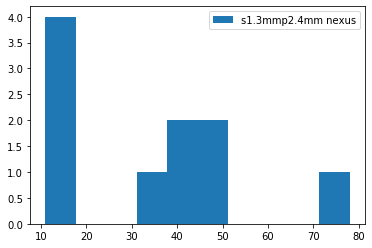

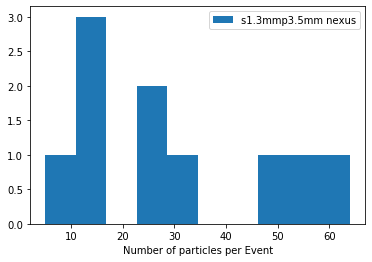

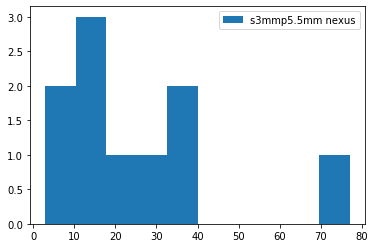

In [51]:
plt.hist(s13mmp24mm_particles.groupby('event_id').apply(lambda grp:grp.count()).primary, label='s1.3mmp2.4mm nexus')
plt.legend()
plt.show()
plt.hist(s13mmp35mm_particles.groupby('event_id').apply(lambda grp:grp.count()).primary, label='s1.3mmp3.5mm nexus')
plt.xlabel('Number of particles per Event')
plt.legend()
plt.show()
plt.hist(s3mmp55mm_particles.groupby('event_id').apply(lambda grp:grp.count()).primary, label='s3mmp5.5mm nexus')
plt.legend()
plt.show()

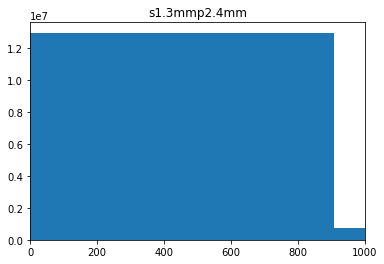

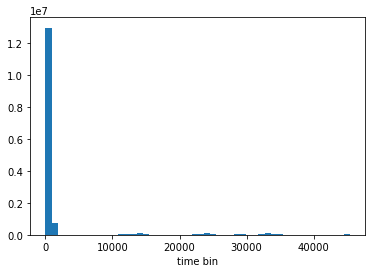

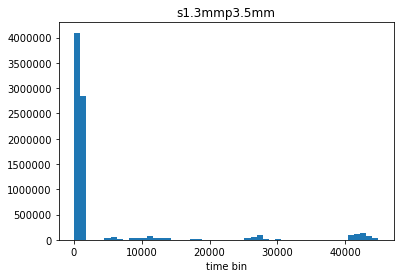

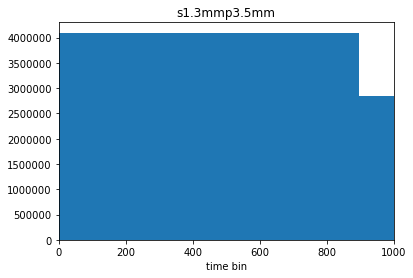

In [35]:
plt.hist(s13mmp24mm_sns_response.time_bin, bins=50)
plt.title('s1.3mmp2.4mm')
plt.xlim(0,1000)
plt.show()
plt.hist(s13mmp24mm_sns_response.time_bin, bins=50)
plt.xlabel('time bin')
plt.show()
plt.hist(s13mmp35mm_sns_response.time_bin, bins=50)
plt.title('s1.3mmp3.5mm')
plt.xlabel('time bin')
plt.show()
plt.hist(s13mmp35mm_sns_response.time_bin, bins=50)
plt.title('s1.3mmp3.5mm')
plt.xlabel('time bin')
plt.xlim(0,1000)
plt.show()

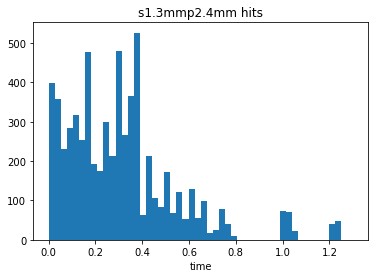

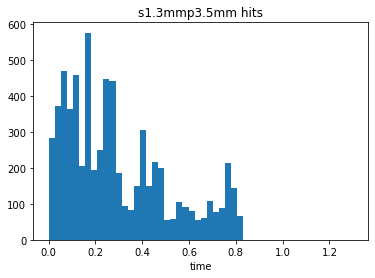

In [36]:
bins = 50
xrange = (0,1.3)
plt.hist(s13mmp24mm_hits.time, bins=bins, range=xrange)
plt.title('s1.3mmp2.4mm hits')
plt.xlabel('time')
plt.show()

plt.hist(s13mmp35mm_hits.time, bins=bins, range=xrange)
plt.title('s1.3mmp3.5mm hits')
plt.xlabel('time')
plt.show()

Text(0.5, 0, 'Sensor ID')

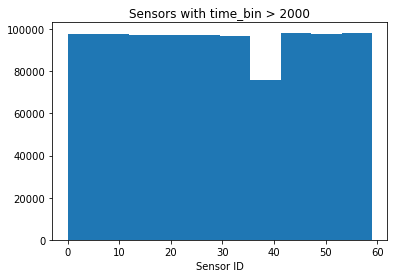

In [12]:
plt.hist(s13mmp35mm_sns_response[s13mmp35mm_sns_response.time_bin > 2000].sensor_id)
plt.title('Sensors with time_bin > 2000')
plt.xlabel('Sensor ID')

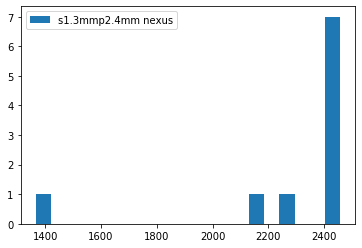

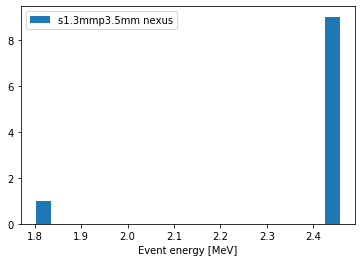

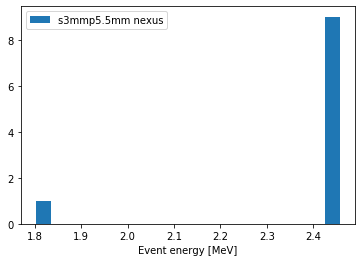

In [45]:
plt.hist(s13mmp24mm_hits.groupby('event_id').apply(lambda grp: grp.energy.sum())*1000, bins=20, label='s1.3mmp2.4mm nexus')
plt.legend()
plt.show()
plt.hist(s13mmp35mm_hits.groupby('event_id').apply(lambda grp: grp.energy.sum()), bins=20, label='s1.3mmp3.5mm nexus')
plt.xlabel('Event energy [MeV]')
plt.legend()
plt.show()
plt.hist(s3mmp55mm_hits.groupby('event_id').apply(lambda grp: grp.energy.sum()), bins=20, label='s3mmp5.5mm nexus')
plt.xlabel('Event energy [MeV]')
plt.legend()
plt.show()

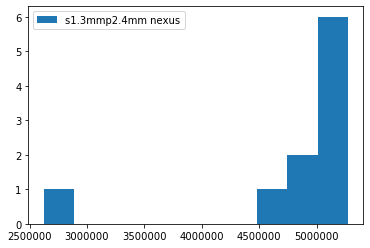

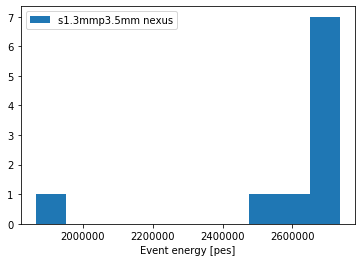

In [38]:
plt.hist(s13mmp24mm_sns_response.groupby('event_id').apply(lambda grp: grp.charge.sum()), label='s1.3mmp2.4mm nexus')
plt.legend()
plt.show()
plt.hist(s13mmp35mm_sns_response.groupby('event_id').apply(lambda grp: grp.charge.sum()), label='s1.3mmp3.5mm nexus')
plt.xlabel('Event energy [pes]')
plt.legend()
plt.show()

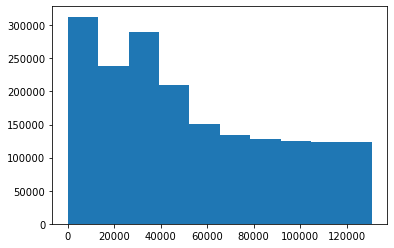

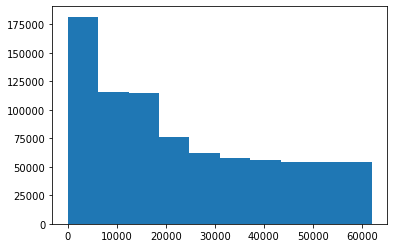

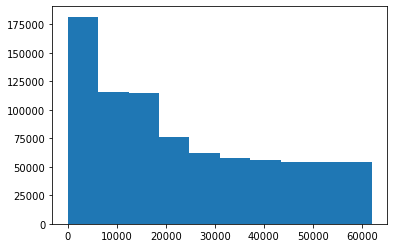

In [47]:
plt.hist(s13mmp24mm_sns_response[s13mmp24mm_sns_response.event_id==0].sensor_id)
plt.show()
plt.close()

plt.hist(s13mmp35mm_sns_response[s13mmp35mm_sns_response.event_id==0].sensor_id)
plt.show()
plt.close()

plt.hist(s3mmp55mm_sns_response[s3mmp55mm_sns_response.event_id==0].sensor_id)
plt.show()

In [40]:
len(s13mmp35mm_sns_response[s13mmp35mm_sns_response.event_id==0].sensor_id.unique())

61112

In [41]:
61053 + 60

61113

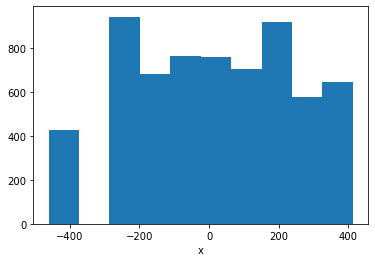

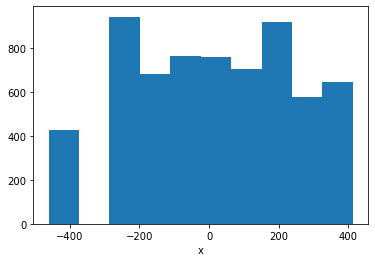

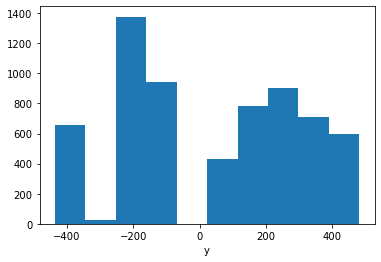

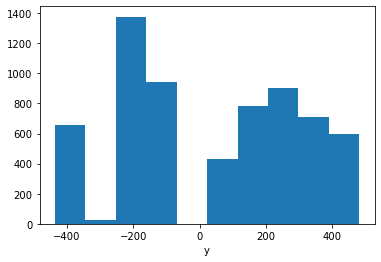

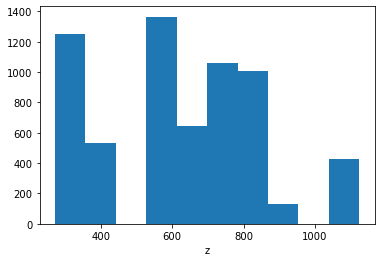

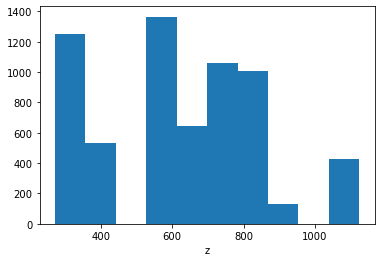

In [13]:
plt.hist(s13mmp35mm_hits.x)
plt.xlabel('x')
plt.show()
plt.hist(s13mmp24mm_hits.x)
plt.xlabel('x')
plt.show()

plt.hist(s13mmp35mm_hits.y)
plt.xlabel('y')
plt.show()
plt.hist(s13mmp24mm_hits.y)
plt.xlabel('y')
plt.show()

plt.hist(s13mmp35mm_hits.z)
plt.xlabel('z')
plt.show()
plt.hist(s13mmp24mm_hits.z)
plt.xlabel('z')
plt.show()

In [14]:
events = 10
start = 650
length = 1205
diam = 980.
j = 0
for i in range(start,start+events):
    print('Event '+str(i)+', Energy = '+str(s13mmp24mm_sns_response[s13mmp24mm_sns_response.event_id==i].charge.sum()) 
         + ', 34 energy = '+str(s13mmp35mm_sns_response[s13mmp35mm_sns_response.event_id==i].charge.sum()))
    print('Buffy energy = '+str(buffy_p35[buffy_p35.event_id==buffy_events[j]].charge.sum()))
    j += 1
    
    plt.scatter(s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].x, s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].y,
            label='s1.3mmp2.4mm')
    plt.scatter(s13mmp35mm_hits[s13mmp35mm_hits.event_id==i].x, s13mmp24mm_hits[s13mmp35mm_hits.event_id==i].y,
            label='s1.3mmp3.5mm')
    plt.legend()
    plt.xlim(-diam/2., diam/2.)
    plt.ylim(-diam/2., diam/2.)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    plt.scatter(s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].x, s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].z,
            label='s1.3mmp2.4mm')
    plt.scatter(s13mmp35mm_hits[s13mmp35mm_hits.event_id==i].x, s13mmp24mm_hits[s13mmp35mm_hits.event_id==i].z,
            label='s1.3mmp3.5mm')
    plt.xlim(-diam/2., diam/2.)
    plt.ylim(0, length)
    plt.xlabel('x')
    plt.ylabel('z')
    plt.legend()
    plt.show()
    
    plt.scatter(s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].y, s13mmp24mm_hits[s13mmp24mm_hits.event_id==i].z,
            label='s1.3mmp2.4mm')
    plt.scatter(s13mmp35mm_hits[s13mmp35mm_hits.event_id==i].y, s13mmp24mm_hits[s13mmp35mm_hits.event_id==i].z,
            label='s1.3mmp3.5mm')
    plt.xlim(-diam/2., diam/2.)
    plt.ylim(0, length)
    plt.xlabel('y')
    plt.ylabel('z')
    plt.legend()
    plt.show()

Event 650, Energy = 0, 34 energy = 0


NameError: name 'buffy_p35' is not defined

In [15]:
buffy_p35_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.buffy.reduced.s1.3mmp3.5mm.h5'
buffy_p35 = pd.read_hdf(buffy_p35_file, 'SiPM/Waveforms')

buffy_p24_file = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.buffy.reduced.s1.3mmp2.4mm.h5'
buffy_p24 = pd.read_hdf(buffy_p24_file, 'SiPM/Waveforms')

In [16]:
buffy_events = buffy_p35.event_id.unique()

In [49]:
buffy_p24.event_id.to_list()

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

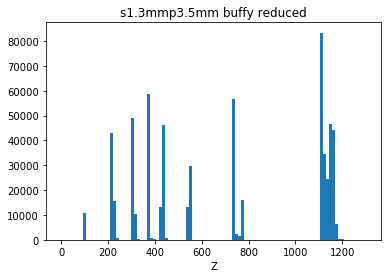

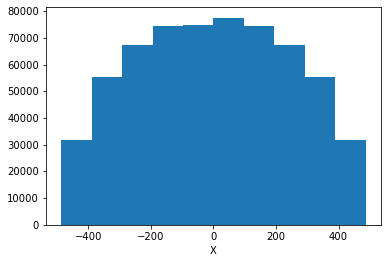

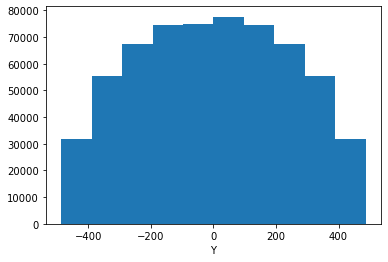

In [18]:
plt.title('s1.3mmp3.5mm buffy reduced')
plt.hist(buffy_p35.Z, bins=100, range=(0,1300))
plt.xlabel('Z')
plt.show()

plt.hist(buffy_p35.X)
plt.xlabel('X')
plt.show()

plt.hist(buffy_p35.Y)
plt.xlabel('Y')
plt.show()

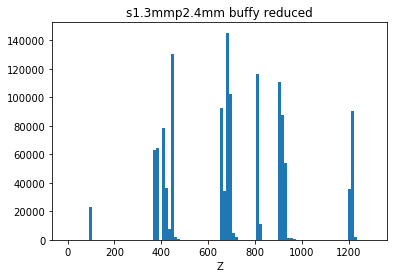

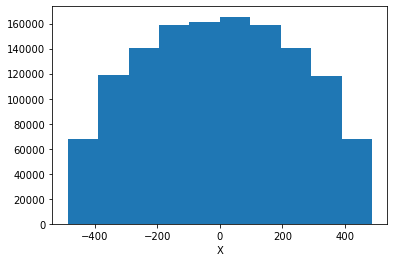

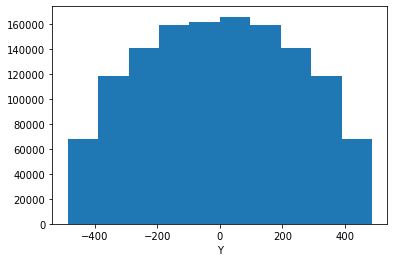

In [19]:
plt.title('s1.3mmp2.4mm buffy reduced')
plt.hist(buffy_p24.Z, bins=100, range=(0,1300))
plt.xlabel('Z')
plt.show()

plt.hist(buffy_p24.X)
plt.xlabel('X')
plt.show()

plt.hist(buffy_p24.Y)
plt.xlabel('Y')
plt.show()

In [20]:
from invisible_cities.database.load_db  import DataPMT, DataSiPM


In [21]:
db_24 = DataSiPM("s13mmp24mm", 0)
db_35 = DataSiPM("s13mmp35mm", 0)

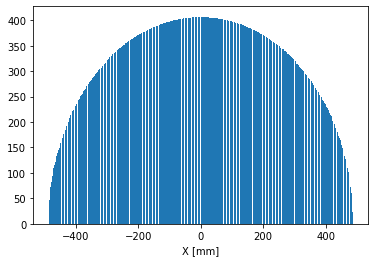

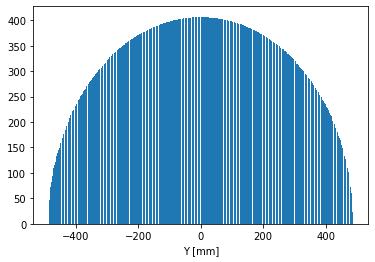

In [22]:
plt.hist(db_24.X, bins=500)
plt.xlabel('X [mm]')
plt.show()

plt.hist(db_24.Y, bins=500)
plt.xlabel('Y [mm]')
plt.show()

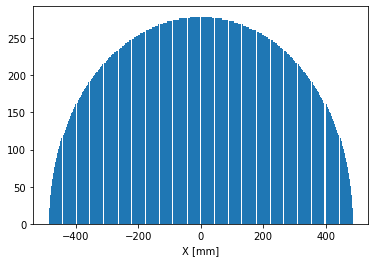

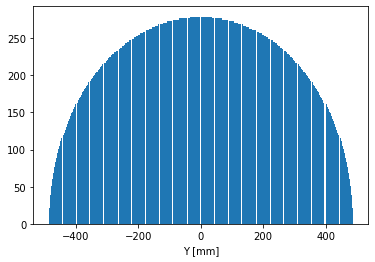

In [23]:
plt.hist(db_35.X, bins=300)
plt.xlabel('X [mm]')
plt.show()

plt.hist(db_35.Y, bins=300)
plt.xlabel('Y [mm]')
plt.show()

## Checking Buffy Output

In [24]:
import pandas as pd
import tables as tb

import warnings

from typing import Callable
from typing import     List

from invisible_cities.core                   import        system_of_units as units
from invisible_cities.detsim.sensor_utils    import   first_and_last_times
from invisible_cities.detsim.sensor_utils    import          get_n_sensors
from invisible_cities.detsim.sensor_utils    import           sensor_order
from invisible_cities.detsim.sensor_utils    import pmt_and_sipm_bin_width
from invisible_cities.io    .event_filter_io import    event_filter_writer
from invisible_cities.io import mcinfo_io
from invisible_cities.io import dst_io
from invisible_cities.reco                   import          tbl_functions as tbl

from invisible_cities.dataflow   import                   dataflow as fl

from invisible_cities.cities.components import                       city
from invisible_cities.cities.components import                    collect
from invisible_cities.cities.components import               copy_mc_info
from invisible_cities.cities.components import calculate_and_save_buffers
from invisible_cities.cities.components import        mcsensors_from_file
from invisible_cities.cities.components import                print_every
from invisible_cities.cities.components import                  wf_binner
from invisible_cities.cities.components import             check_max_time

from invisible_cities.cities.buffy import pmt_and_sipm_bin_width_safe_

In [25]:
compression = 'ZLIB4' 
run_number = 0 
print_mod = 1 
event_range = all
rate = 0.5 #* hertz 
max_time  = 10 * units.ms 
buffer_length   = 2000 * units.mus
pre_trigger = 200 * units.mus
trigger_threshold =  0 

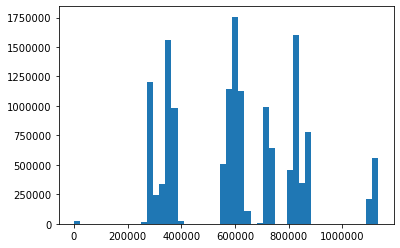

In [26]:
dbfile = 's13mmp24mm'
this_file = s13mmp24mm_file
max_time = check_max_time(max_time, buffer_length)
npmt, nsipm = get_n_sensors(dbfile, 0)
pmt_wid, sipm_wid = pmt_and_sipm_bin_width(this_file)
nsamp_sipm        = int(buffer_length / sipm_wid)

mcsensors = mcsensors_from_file([this_file], dbfile, 0, rate)
sns_resp = mcinfo_io.load_mcsensor_response_df(this_file, db_file=dbfile, run_no=0)

plt.hist(sns_resp.time , bins=50)
plt.show()


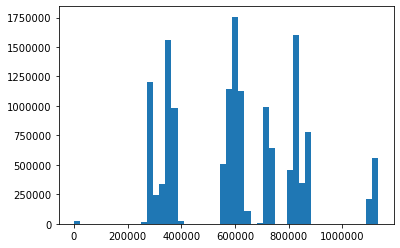

In [27]:
dbfile = 's13mmp35mm'
detector_db = dbfile
this_file = s13mmp24mm_file
files_in = [this_file]
max_time = check_max_time(max_time, buffer_length)
npmt, nsipm = get_n_sensors(dbfile, 0)
pmt_wid, sipm_wid = pmt_and_sipm_bin_width(this_file)
nsamp_sipm        = int(buffer_length / sipm_wid)

mcsensors = mcsensors_from_file([this_file], dbfile, 0, rate)
sns_resp = mcinfo_io.load_mcsensor_response_df(this_file, db_file=dbfile, run_no=0)

plt.hist(sns_resp.time, bins=50)
plt.show()

In [28]:
dst_loaded = dst_io.load_dst(this_file, group='MC', node='sns_response')

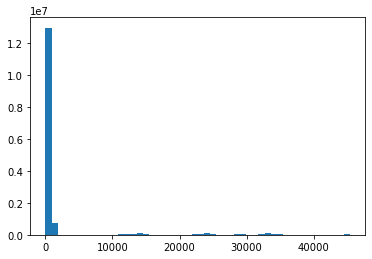

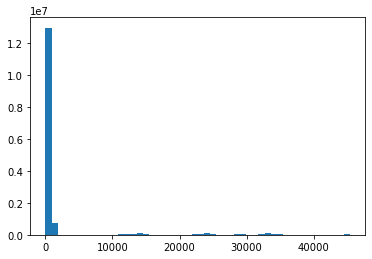

In [29]:
dbfile = 's13mmp24mm'
this_file = s13mmp24mm_file
dst_loaded = dst_io.load_dst(this_file, group='MC', node='sns_response')
plt.hist(dst_loaded.time_bin, bins=50)
plt.show()

dbfile = 's13mmp35mm'
this_file = s13mmp35mm_file
dst_loaded = dst_io.load_dst(this_file, group='MC', node='sns_response')
plt.hist(dst_loaded.time_bin, bins=50)
plt.show()

In [30]:
max_time          = check_max_time(max_time, buffer_length)
npmt, nsipm       = get_n_sensors(detector_db, run_number)
pmt_wid, sipm_wid = pmt_and_sipm_bin_width_safe_(files_in)
nsamp_pmt         = int(buffer_length /  pmt_wid)
nsamp_sipm        = int(buffer_length / sipm_wid)
print(max_time, npmt, nsipm)
print(pmt_wid, sipm_wid)
print(nsamp_pmt, nsamp_sipm)

10000000.0 60 61053
25.0 1000.0
80000 2000


In [31]:
import invisible_cities.cities.buffy as buffy

In [32]:
buffy.pmt_and_sipm_bin_width_safe_([this_file])

(25.0, 1000.0)

In [33]:
bin_calculation   = wf_binner(max_time)

In [34]:
bin_sensors(sensors   : pd.DataFrame,
                bin_width : float       ,
                t_min     : float       ,
                t_max     : float       ,
                max_buffer: int         ) -> Tuple[np.ndarray, pd.Series]:

SyntaxError: invalid syntax (<ipython-input-34-a1e2784ccd3d>, line 1)

# Raw Buffy

In [37]:
s13mmp35mm_bfile = '/Users/taylorcontreras/Development/Research/trackingplane/data/test_12082022/flex.0vbb.0.buffy.s1.3mmp2.4mm.h5'
s13mmp35mm_h5 = tb.open_file(s13mmp35mm_bfile)

In [39]:
np.shape(s13mmp35mm_h5.root.sipmrd)

(10, 129889, 2000)

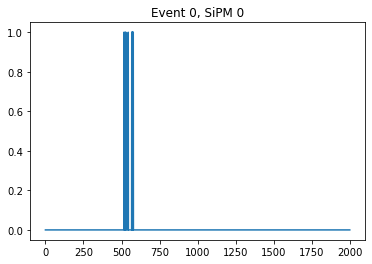

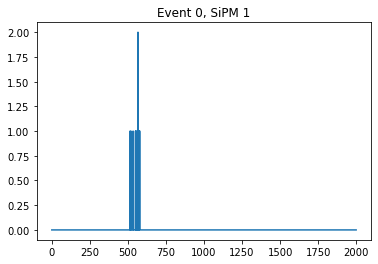

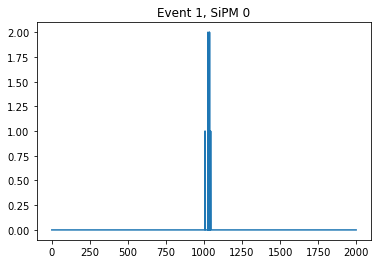

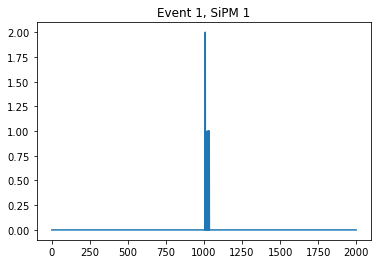

In [43]:
events = 2
event_id = 0
nsensors = 2
event_ids, sipm_charge, xval, yval, zval, sensors = [], [], [], [], [], []
for evt in range(0,events):
    sens = 0

    for sipmi in s13mmp35mm_h5.root.sipmrd[evt, :]:
            if(sum(sipmi) > 0.) and sens < nsensors:
                sensor_id = 1000+sens
                plt.plot(sipmi)
                plt.title('Event '+str(evt)+', SiPM '+str(sens))
                plt.show()
                
                sens = sens + 1
            else:
                sens = sens + 1